<a href="https://colab.research.google.com/github/Mukilan20050420/project/blob/main/controller_for_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [3]:
traffic_a = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic_a')
traffic_b = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic_b')

In [4]:
signal_a = ctrl.Consequent(np.arange(0, 61, 1), 'signal_a')

In [5]:
traffic_a['low'] = fuzz.trimf(traffic_a.universe, [0, 0, 50])
traffic_a['medium'] = fuzz.trimf(traffic_a.universe, [25, 50, 75])
traffic_a['high'] = fuzz.trimf(traffic_a.universe, [50, 100, 100])

In [6]:
traffic_b['low'] = fuzz.trimf(traffic_b.universe, [0, 0, 50])
traffic_b['medium'] = fuzz.trimf(traffic_b.universe, [25, 50, 75])
traffic_b['high'] = fuzz.trimf(traffic_b.universe, [50, 100, 100])

In [7]:
signal_a['short'] = fuzz.trimf(signal_a.universe, [0, 0, 30])
signal_a['medium'] = fuzz.trimf(signal_a.universe, [20, 30, 40])
signal_a['long'] = fuzz.trimf(signal_a.universe, [30, 60, 60])

In [8]:
rule1 = ctrl.Rule(traffic_a['low'] & traffic_b['high'], signal_a['short'])
rule2 = ctrl.Rule(traffic_a['low'] & traffic_b['medium'], signal_a['short'])
rule3 = ctrl.Rule(traffic_a['medium'] & traffic_b['low'], signal_a['long'])
rule4 = ctrl.Rule(traffic_a['medium'] & traffic_b['medium'], signal_a['medium'])
rule5 = ctrl.Rule(traffic_a['high'] & traffic_b['low'], signal_a['long'])
rule6 = ctrl.Rule(traffic_a['high'] & traffic_b['medium'], signal_a['medium'])
rule7 = ctrl.Rule(traffic_a['high'] & traffic_b['high'], signal_a['medium'])


In [9]:
signal_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
signal_simulation = ctrl.ControlSystemSimulation(signal_ctrl)

In [14]:
def test_fuzzy_logic(traffic_a_value, traffic_b_value):
    # Set inputs
    signal_simulation.input['traffic_a'] = traffic_a_value
    signal_simulation.input['traffic_b'] = traffic_b_value
    signal_simulation.compute()

In [16]:
# In cell ipython-input-9-75b98876e0bd
signal_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
signal_simulation = ctrl.ControlSystemSimulation(signal_ctrl)

# **Change:** Explicitly define output variable in ControlSystemSimulation
# This links the 'signal_a' Consequent to the output of the simulation.
signal_simulation.output['signal_a'] = signal_a # Added line

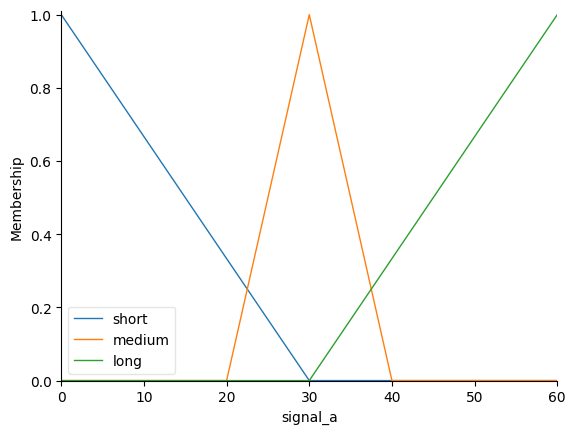

In [17]:
signal_a.view(sim=signal_simulation)
plt.show()

In [18]:
test_fuzzy_logic(70, 40)
test_fuzzy_logic(30, 90)
test_fuzzy_logic(50, 50)